# Theory

## 1.- Convexity

* b) Given a two functions, $f_1$ and $f_2$, find the minimum optimum value by using **gradient descent** with $x_0 = 0$ and an arbitrary $\alpha$. What values for $\alpha$make the algorithm more efficient?

  * **$f_1(x)$**:
$$
    f_1(x) = x^2 - 2ex + e^2 - 2 \\
    f_1(x) = (e - x)^2 - 2
$$

  * **$f_2(x)$**:
$$
    f_2(x) = x^6 - 6ex^5 + 15e^2x^4 - 20e^3x^3 + 15e^4x^2 - 6e^5x + e^6 - 6 \\
    f_1(x) = (e - x)^6 - 6
$$

In [79]:
# Functions implementation
import numpy as np

def f1(x):
    """F1 implementation."""
    return ((np.e - x) ** 2) - 2

def f2(x):
    """F2 implementation."""
    return ((np.e - x) ** 6) - 6


**$f_1$ derivative**:
$$f_1'(x) = 2x - 2e$$

**$f_2$ derivative**:
$$
    f_2'(x) =  6 x^5  - 30 e x^4  + 60 e^2 x^3  - 60 e^3 x^2 + 30 e^4 x - 6 e^5 \\
    f_2'(x) = -6(e-x)^5
$$

In [87]:
# Derivatives implementation
import numpy as np

def df1(x):
    """F1's first derivative."""
    return -2 * (np.e - x)

def df2(x):
    """F2's first derivative."""
    return np.longdouble((-6) * ((np.e - np.longdouble(x)) **6))

In [3]:
# Gradient descent implementation

def gradient_descent(x, alpha, df, precision=0.00000001, max_iters=1000000):
    """Gradient descent."""
    previous_step_size = 1
    iters = 0
    while previous_step_size > precision and iters < max_iters:
        last_x = x
        x -= alpha * df(last_x)
        previous_step_size = abs(x - last_x)
        iters += 1
    return x, iters

In order to be able to answer the last question, we'll run the gradient descent with multiple values of $\alpha$

Testing F1 alphas with values:
	 [1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]


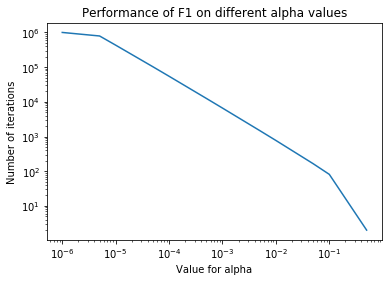

Best alpha value for F1 is 0.5 with 2 iterations.
	Optimum x found at 2.718281828459045
		Results standard deviation: 0.1016348443
		Results mean: 2.6874863939
		Results median: 2.7182743430


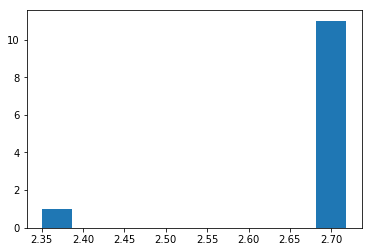

Testing F2 alphas with values:
	 [5e-05, 0.0001, 0.0005, 0.001]


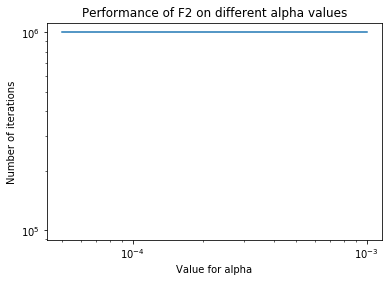

Best alpha value for F2 is 5e-05 with 1000000 iterations.
	Optimum x found at 2.486659346191914
		Results standard deviation: 0.0419983528
		Results mean: 2.5417138838
		Results median: 2.5443903372


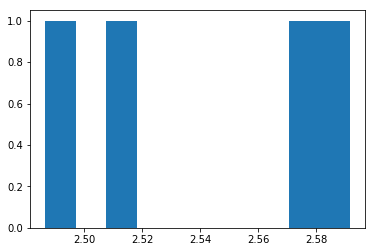

In [118]:
# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# Test alphas function
def test_alphas(x, alphas, f, df, f_name):
    """Test alphas on the given derivative and plot the results."""
    X = alphas
    Y = []
    best_alpha = {'alpha': None, 'iterations': 10000000, 'optimum_x': None}
    results = []
    for alpha in alphas:
        optimum_x, iters = gradient_descent(x, alpha, df)
        results.append(optimum_x)
        Y.append(iters)
        if best_alpha['iterations'] > iters:
            best_alpha['alpha'] = alpha
            best_alpha['iterations'] = iters
            best_alpha['optimum_x'] = optimum_x

    plt.figure()
    plt.title("Performance of {} on different alpha values".format(f_name))
    plt.plot(X, Y)
    plt.ylabel('Number of iterations')
    plt.xlabel('Value for alpha')
    plt.yscale('log')
    plt.xscale('log')
    plt.show()
    print(
        "Best alpha value for {f_name} is {alpha} "
        "with {iterations} iterations.\n"
        "\tOptimum x (found with alpha) at {optimum_x}".format(f_name=f_name, **best_alpha)
    )
    print("\t\tResults standard deviation: %.10f" % np.std(results))
    print("\t\tResults mean: %.10f" % np.mean(results))
    print("\t\tResults median: %.10f" % np.median(results))
    plt.figure()
    plt.hist(results)
    plt.show()


# Generate alphas for F1
alphas = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
print("Testing F1 alphas with values:\n\t", alphas)
test_alphas(0, alphas, f1, df1, 'F1')

# Generate alphas for F1
alphas = [0.00005, 0.0001, 0.0005, 0.001]
print("Testing F2 alphas with values:\n\t", alphas)
#gradient_descent(0, .001, df2)
test_alphas(0, alphas, f2, df2, 'F2')
#best_f2_alpha = test_alphas(0, alphas, df2, 'Performance of F1 on different alpha values')